# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
\nabla_w Q(w) = \frac{2}{\ell} X^\top (X w - y)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/70588/run-report/126134613/


* **StochasticDescent**: https://contest.yandex.ru/contest/70588/run-report/126135621/


* **MomentumDescent**: https://contest.yandex.ru/contest/70588/run-report/126248086/


* **Adam**: https://contest.yandex.ru/contest/70588/run-report/126250907/


* **LinearRegression**: https://contest.yandex.ru/contest/70588/run-report/126412393/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

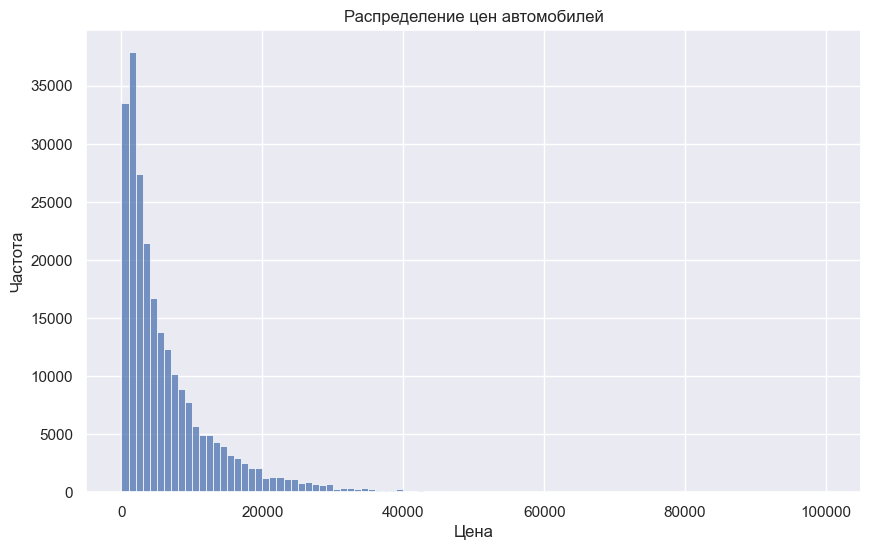

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=100)
plt.title('Распределение цен автомобилей')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

Как мы видим наше распределение смещено влево следовательно поэтому нам нужно использовать логарифм

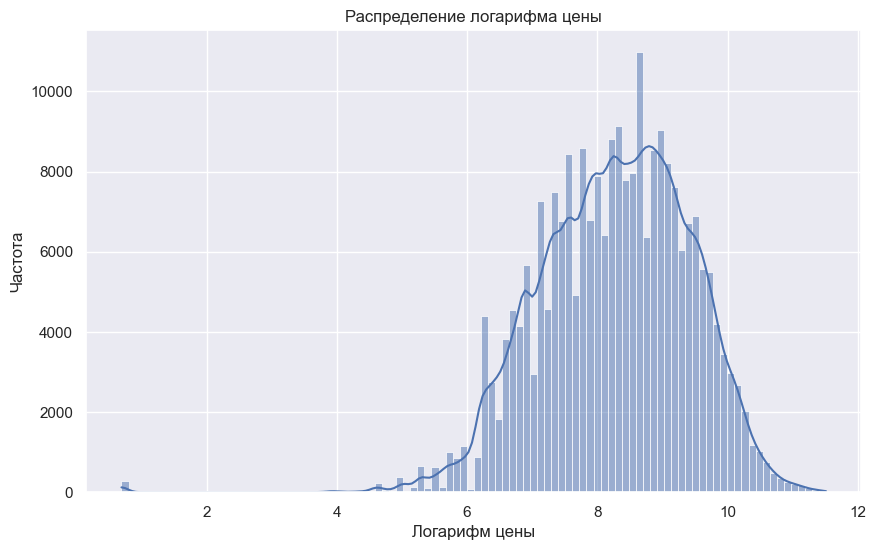

In [10]:
data['log_price'] = np.log1p(data['price'])

plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], bins=100, kde=True)
plt.title('Распределение логарифма цены')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.show()

Удаляем выбросы

In [11]:
lower_quantile = data['price'].quantile(0.01)
upper_quantile = data['price'].quantile(0.99)

data = data[(data['price'] >= lower_quantile) & (data['price'] <= upper_quantile)]

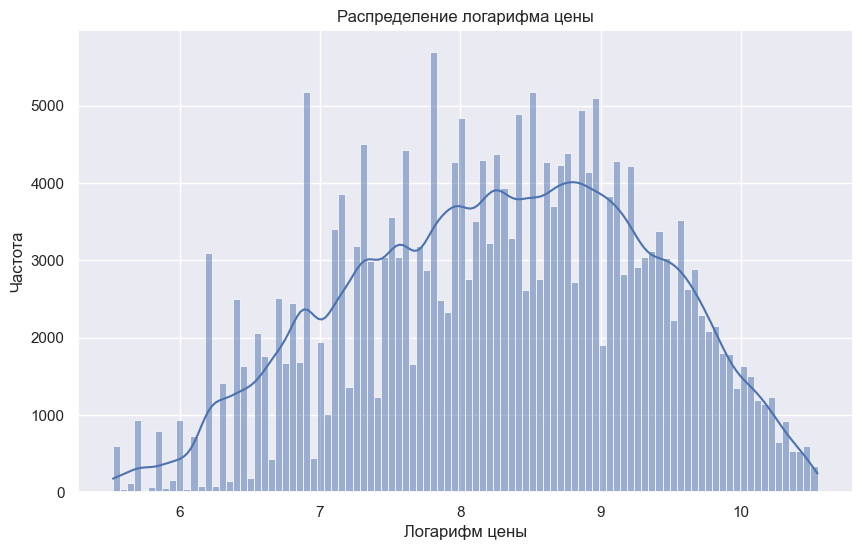

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], bins=100, kde=True)
plt.title('Распределение логарифма цены')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.show()

Проанализируем признаки: 

brand

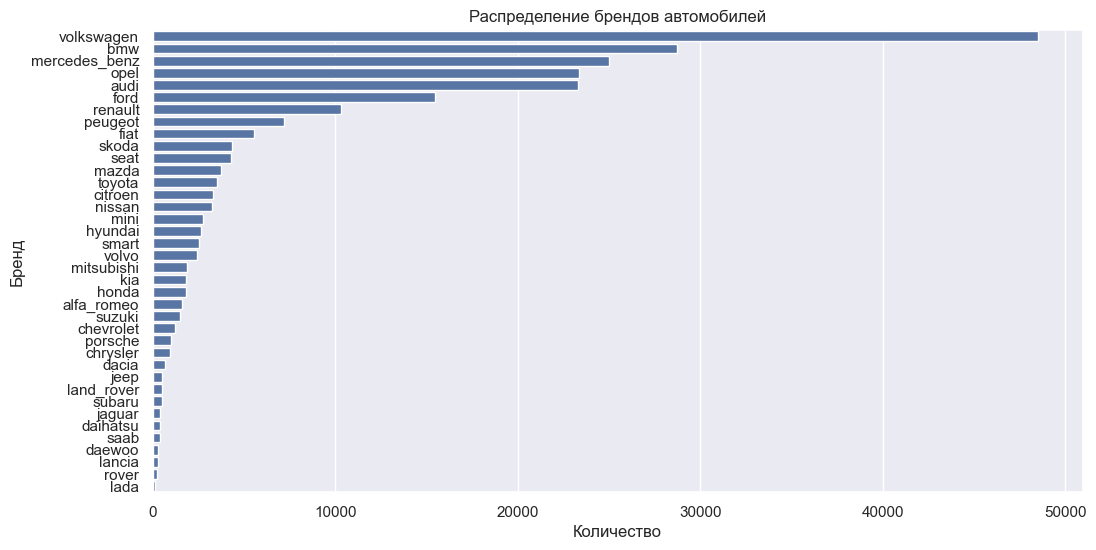

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(y='brand', data=data, order=data['brand'].value_counts().index)
plt.title('Распределение брендов автомобилей')
plt.xlabel('Количество')
plt.ylabel('Бренд')
plt.show()

Как мы видим по данному признаку идет значительный перевес в сторону немецких брендов

Теперь выясним взаимосвязь с целевой переменной

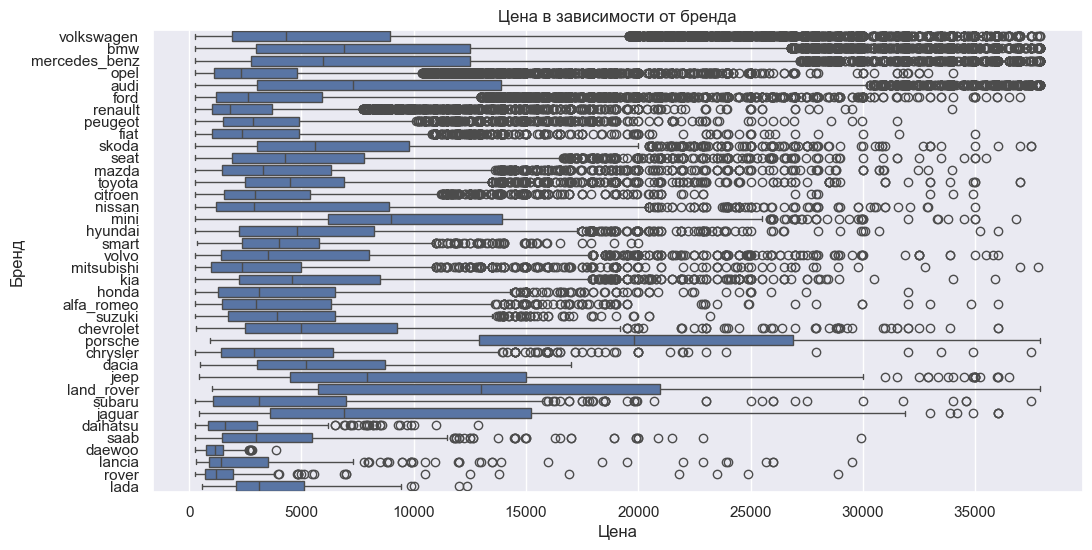

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='brand', data=data, order=data['brand'].value_counts().index)
plt.title('Цена в зависимости от бренда')
plt.xlabel('Цена')
plt.ylabel('Бренд')
plt.show()

Как мы видим определенным брендам характерен отличительный диапазон цен

vehicleType 

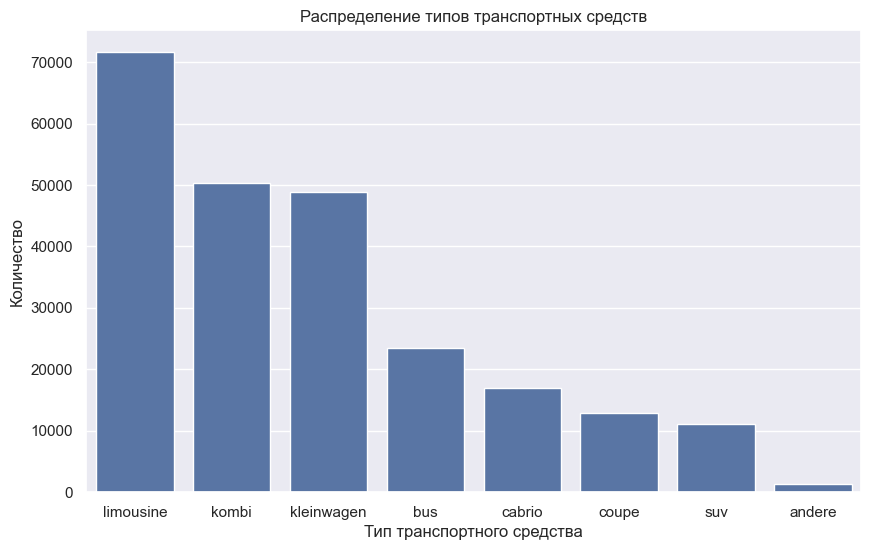

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='vehicleType', data=data, order=data['vehicleType'].value_counts().index)
plt.title('Распределение типов транспортных средств')
plt.xlabel('Тип транспортного средства')
plt.ylabel('Количество')
plt.show()

Как мы видим самыми популярными являютсмя седаны, универсалы и малолитражки.

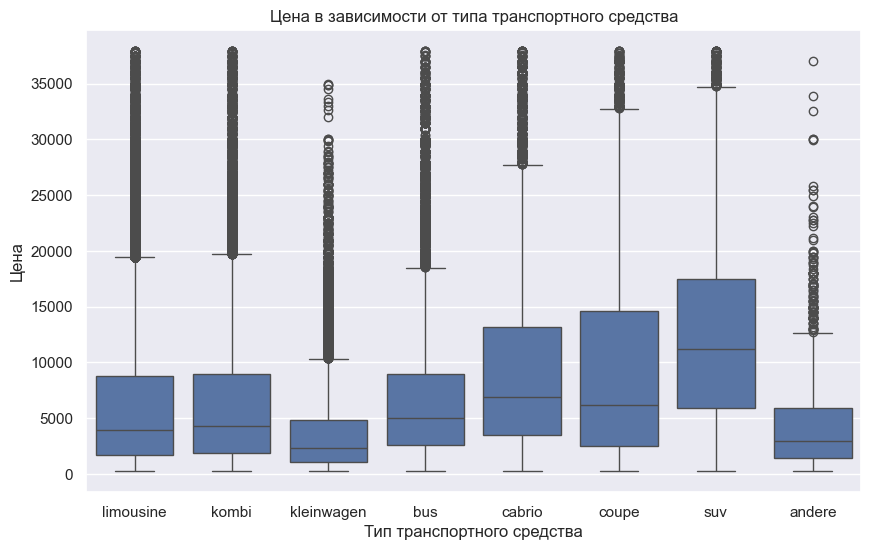

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='vehicleType', y='price', data=data, order=data['vehicleType'].value_counts().index)
plt.title('Цена в зависимости от типа транспортного средства')
plt.xlabel('Тип транспортного средства')
plt.ylabel('Цена')
plt.show()


Внедорожники самая дорогая категория

gearbox

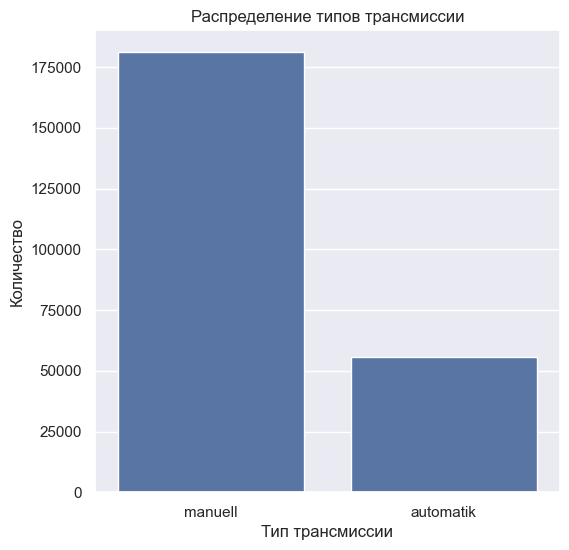

In [17]:
plt.figure(figsize=(6, 6))
sns.countplot(x='gearbox', data=data)
plt.title('Распределение типов трансмиссии')
plt.xlabel('Тип трансмиссии')
plt.ylabel('Количество')
plt.show()

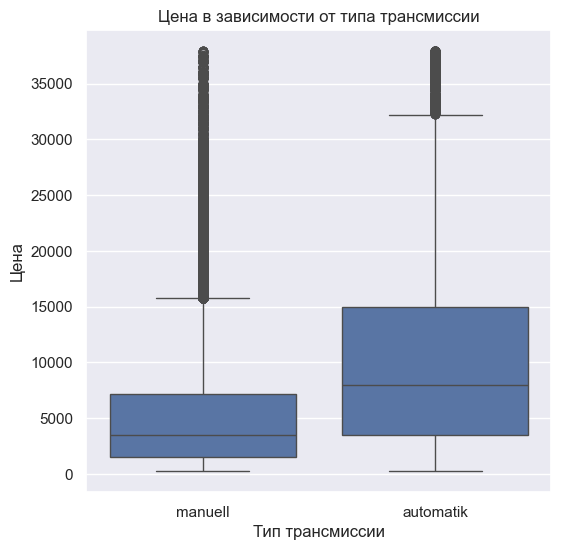

In [18]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='gearbox', y='price', data=data)
plt.title('Цена в зависимости от типа трансмиссии')
plt.xlabel('Тип трансмиссии')
plt.ylabel('Цена')
plt.show()

Безусловно данный признак влияет на цену поскольку механика всегда дешевле

fuelType 

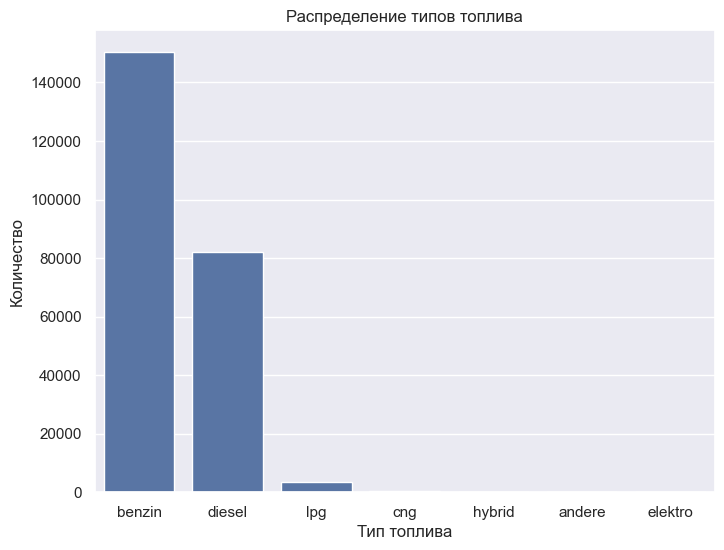

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fuelType', data=data, order=data['fuelType'].value_counts().index)
plt.title('Распределение типов топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Количество')
plt.show()

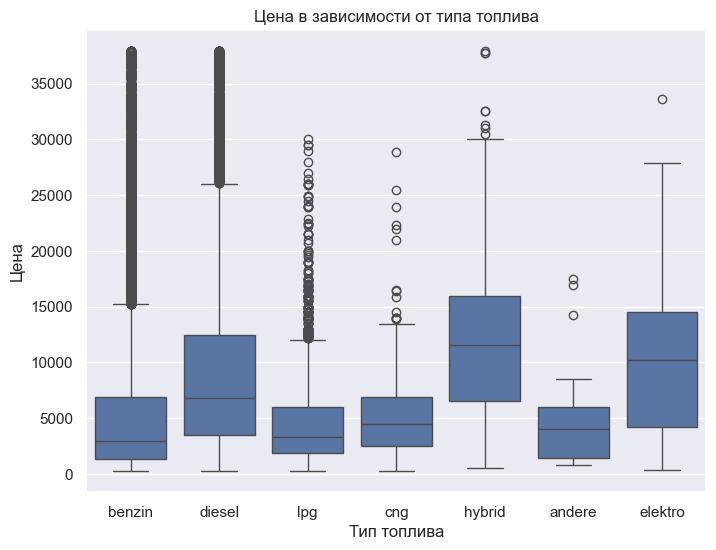

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fuelType', y='price', data=data, order=data['fuelType'].value_counts().index)
plt.title('Цена в зависимости от типа топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Цена')
plt.show()

Можно выделить что дизель дороже бензина, остальные же типы двигателя встречаются редко.

notRepairedDamage 

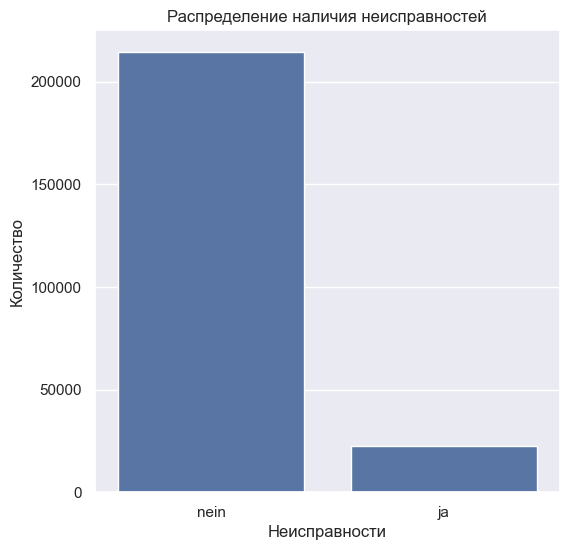

In [21]:
plt.figure(figsize=(6, 6))
sns.countplot(x='notRepairedDamage', data=data)
plt.title('Распределение наличия неисправностей')
plt.xlabel('Неисправности')
plt.ylabel('Количество')
plt.show()

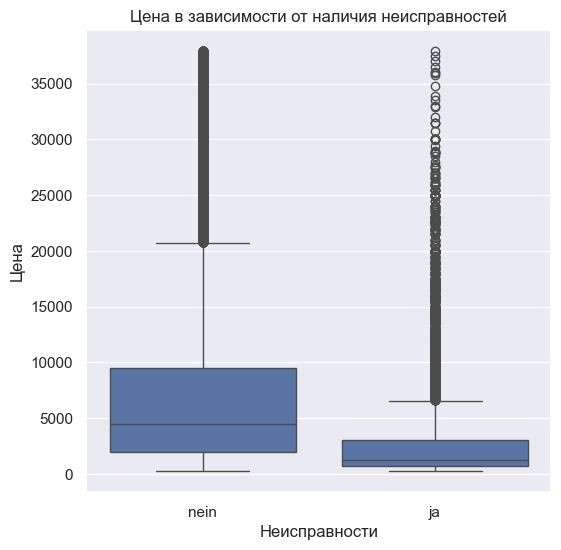

In [22]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='notRepairedDamage', y='price', data=data)
plt.title('Цена в зависимости от наличия неисправностей')
plt.xlabel('Неисправности')
plt.ylabel('Цена')
plt.show()

Безусловно данный фактор влияет на цену автомобиля ограничивая ее на более низкой оценке.

powerPS 

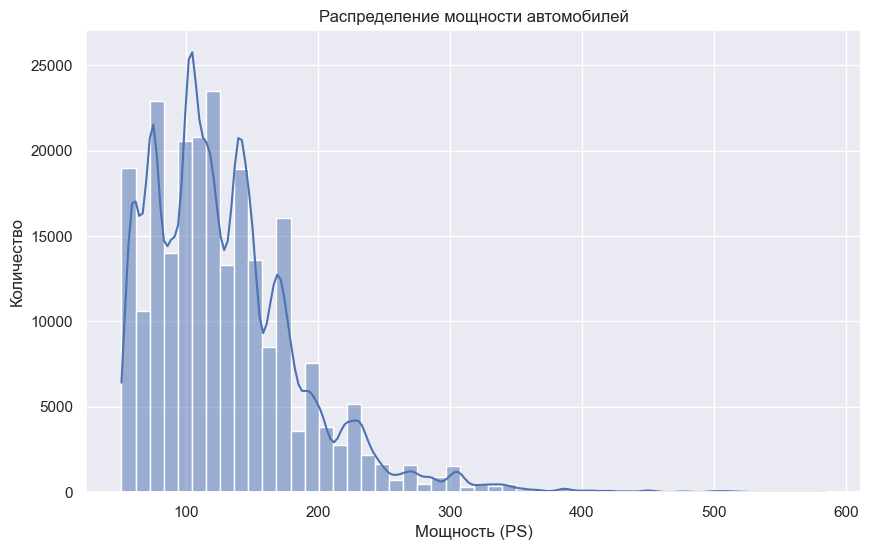

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data['powerPS'], bins=50, kde=True)
plt.title('Распределение мощности автомобилей')
plt.xlabel('Мощность (PS)')
plt.ylabel('Количество')
plt.show()

Здесь у нас присутствуют выбросы с очень большой мощностью давайте их удалим 

In [24]:
data = data[(data['powerPS'] >= 50) & (data['powerPS'] <= 500)]

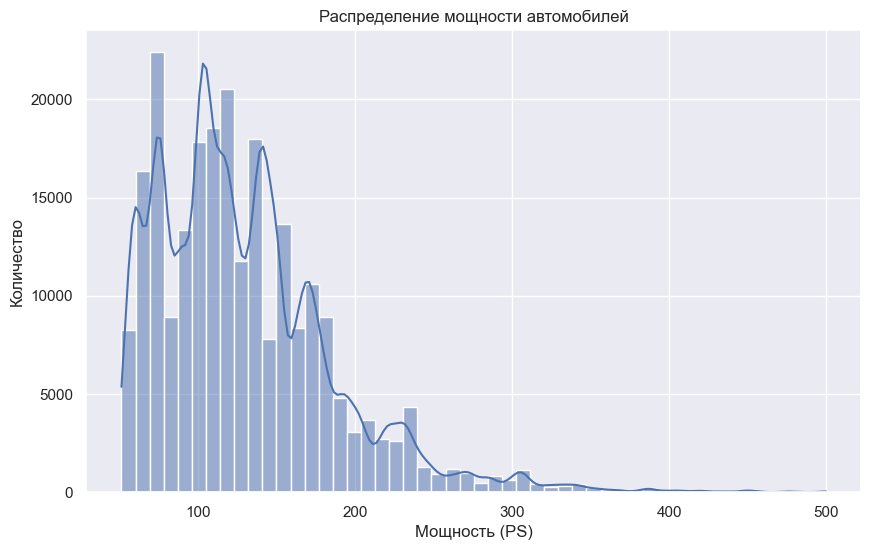

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data['powerPS'], bins=50, kde=True)
plt.title('Распределение мощности автомобилей')
plt.xlabel('Мощность (PS)')
plt.ylabel('Количество')
plt.show()

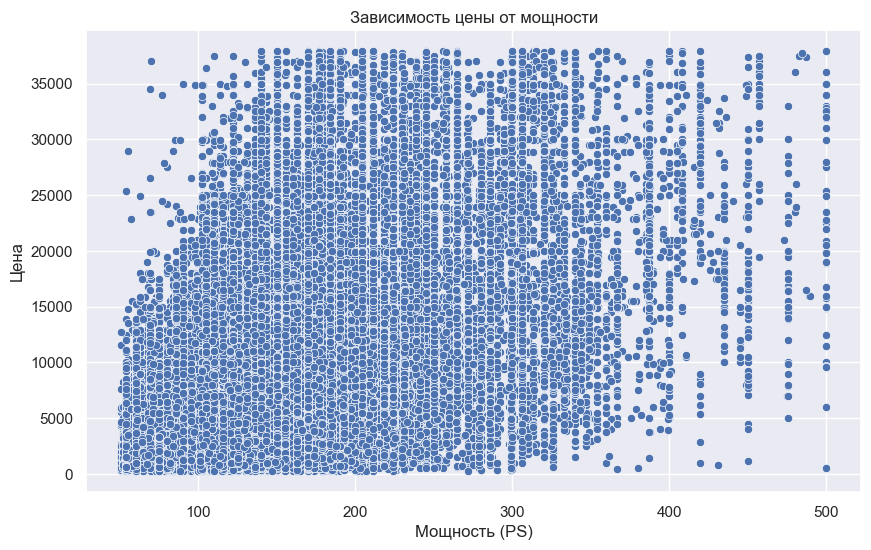

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='powerPS', y='price', data=data)
plt.title('Зависимость цены от мощности')
plt.xlabel('Мощность (PS)')
plt.ylabel('Цена')
plt.show()

Здесь сложно визуально разглядеть взаимосвязь поскольку разброс в цене может зависеть далеко не только от мощности, однако все же можно заметить что с ростом лошадей цена увеличивается.

kilometer 

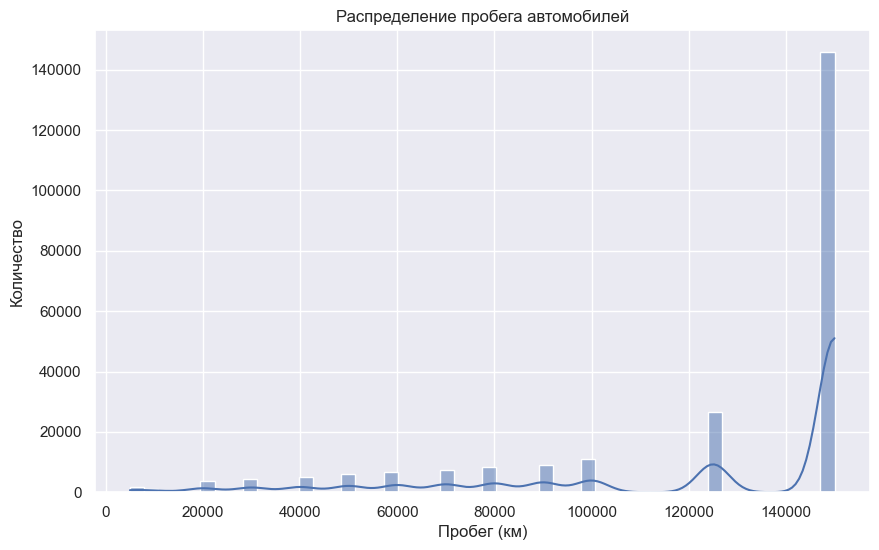

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data['kilometer'], bins=50, kde=True)
plt.title('Распределение пробега автомобилей')
plt.xlabel('Пробег (км)')
plt.ylabel('Количество')
plt.show()

Как мы видим в большинстве случаев пробег около  150000

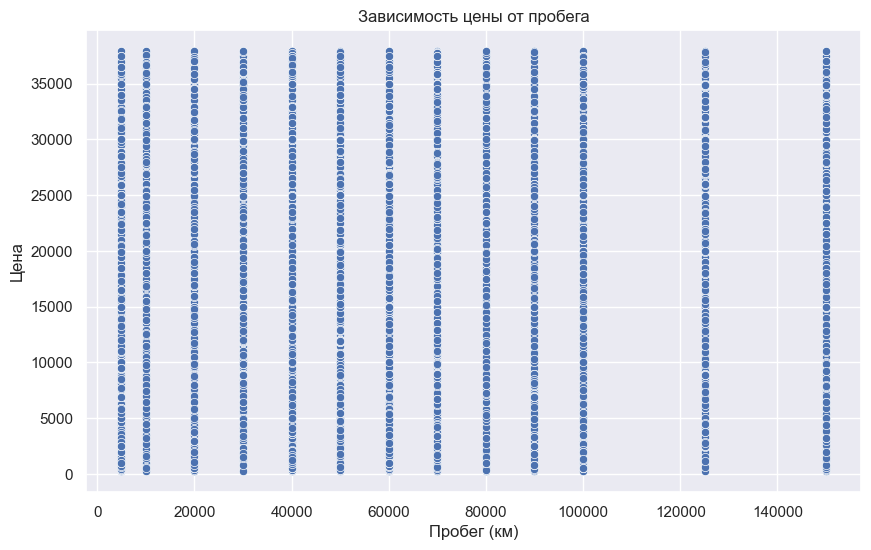

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kilometer', y='price', data=data)
plt.title('Зависимость цены от пробега')
plt.xlabel('Пробег (км)')
plt.ylabel('Цена')
plt.show()

Здесь увы еще сложнее визуально проанализировать, и все же будет логичным предположить что с ростом пробега цена снижается.

autoAgeMonths 

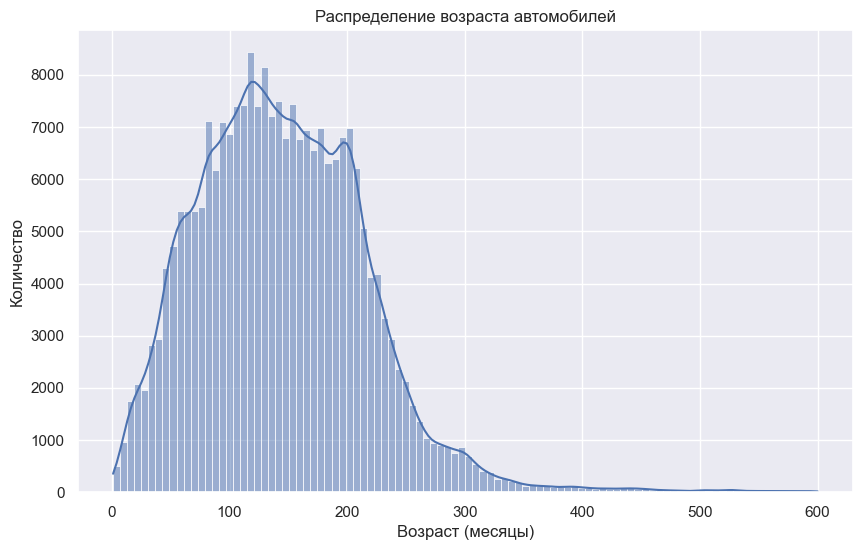

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data['autoAgeMonths'], bins=100, kde=True)
plt.title('Распределение возраста автомобилей')
plt.xlabel('Возраст (месяцы)')
plt.ylabel('Количество')
plt.show()

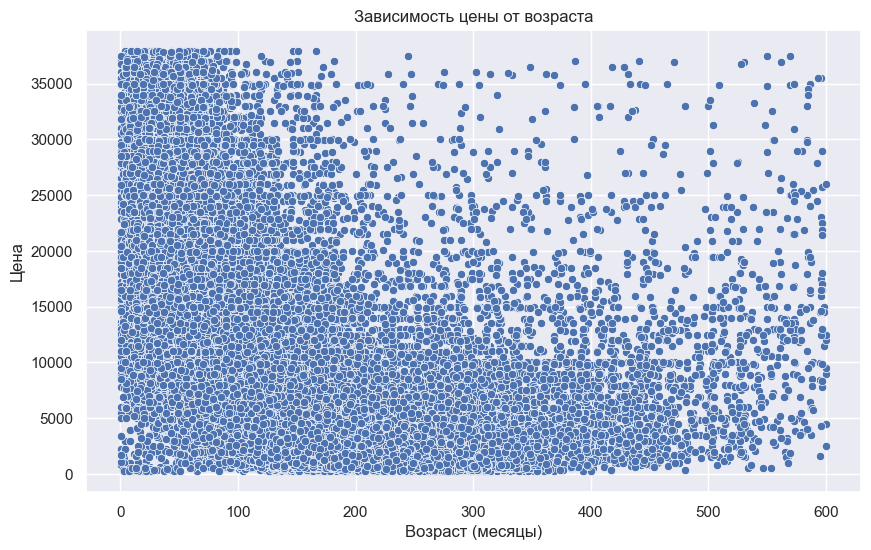

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='autoAgeMonths', y='price', data=data)
plt.title('Зависимость цены от возраста')
plt.xlabel('Возраст (месяцы)')
plt.ylabel('Цена')
plt.show()

Мы наблюдаем что с большим возрастом цена автомобиля снижается.

Я решил отказаться от признака model поскольку он может содержать слишком много уникальных значений, и его использование может привести к переобучению.

In [31]:
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

In [32]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(f"Размер обучающей выборки: {x_train.shape}")
print(f"Размер валидационной выборки: {x_val.shape}")
print(f"Размер тестовой выборки: {x_test.shape}")


Размер обучающей выборки: (189244, 61)
Размер валидационной выборки: (23655, 61)
Размер тестовой выборки: (23656, 61)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

methods = ['full', 'stochastic', 'momentum', 'adam']
lambdas = np.logspace(-5, 0, num=6)
results = {}

tolerance = 1e-4
max_iter = 1000

x_train_full = np.vstack((x_train, x_val))
y_train_full = np.hstack((y_train, y_val))

for method in methods:
    print(f"\nМетод: {method}")
    best_lambda = None
    best_val_loss = float('inf')
    best_model = None
    best_loss_history = None
    best_iterations = 0

    for lambda_ in lambdas:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': x_train.shape[1],
                'lambda_': lambda_
            }
        }

        if method == 'stochastic':
            descent_config['kwargs']['batch_size'] = 50

        model = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter
        )

        model.fit(x_train, y_train)
        y_val_pred = model.predict(x_val)
        val_loss = mean_squared_error(y_val, y_val_pred)

        print(f"lambda_: {lambda_:.5f}, Валидационная MSE: {val_loss:.5f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_lambda = lambda_
            best_model = model
            best_loss_history = model.loss_history.copy()
            best_iterations = len(model.loss_history) - 1

    print(f"Лучшее lambda_ для метода {method}: {best_lambda:.5f}")

    descent_config['kwargs']['lambda_'] = best_lambda
    descent_config['kwargs']['dimension'] = x_train_full.shape[1]

    if method == 'stochastic':
        descent_config['kwargs']['batch_size'] = 50

    final_model = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance,
        max_iter=max_iter
    )

    final_model.fit(x_train_full, y_train_full)

    y_train_pred = final_model.predict(x_train_full)
    y_test_pred = final_model.predict(x_test)

    train_loss = mean_squared_error(y_train_full, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train_full, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    iterations = len(final_model.loss_history) - 1

    results[method] = {
        'best_lambda': best_lambda,
        'train_loss': train_loss,
        'test_loss': test_loss,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'iterations': iterations,
        'loss_history': final_model.loss_history
    }



Метод: full
lambda_: 0.00001, Валидационная MSE: 37.06620
lambda_: 0.00010, Валидационная MSE: 47.15127
lambda_: 0.00100, Валидационная MSE: 24.84541
lambda_: 0.01000, Валидационная MSE: 6.05889
lambda_: 0.10000, Валидационная MSE: 0.68211
lambda_: 1.00000, Валидационная MSE: 0.30515
Лучшее lambda_ для метода full: 1.00000

Метод: stochastic
lambda_: 0.00001, Валидационная MSE: 29.85419
lambda_: 0.00010, Валидационная MSE: 39.26449
lambda_: 0.00100, Валидационная MSE: 23.77026
lambda_: 0.01000, Валидационная MSE: 5.28724
lambda_: 0.10000, Валидационная MSE: 0.56270
lambda_: 1.00000, Валидационная MSE: 3.69011
Лучшее lambda_ для метода stochastic: 0.10000

Метод: momentum
lambda_: 0.00001, Валидационная MSE: 36.67494
lambda_: 0.00010, Валидационная MSE: 39.10785
lambda_: 0.00100, Валидационная MSE: 5.90817
lambda_: 0.01000, Валидационная MSE: 0.73470
lambda_: 0.10000, Валидационная MSE: 0.32296
lambda_: 1.00000, Валидационная MSE: 0.27350
Лучшее lambda_ для метода momentum: 1.00000

Ме

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

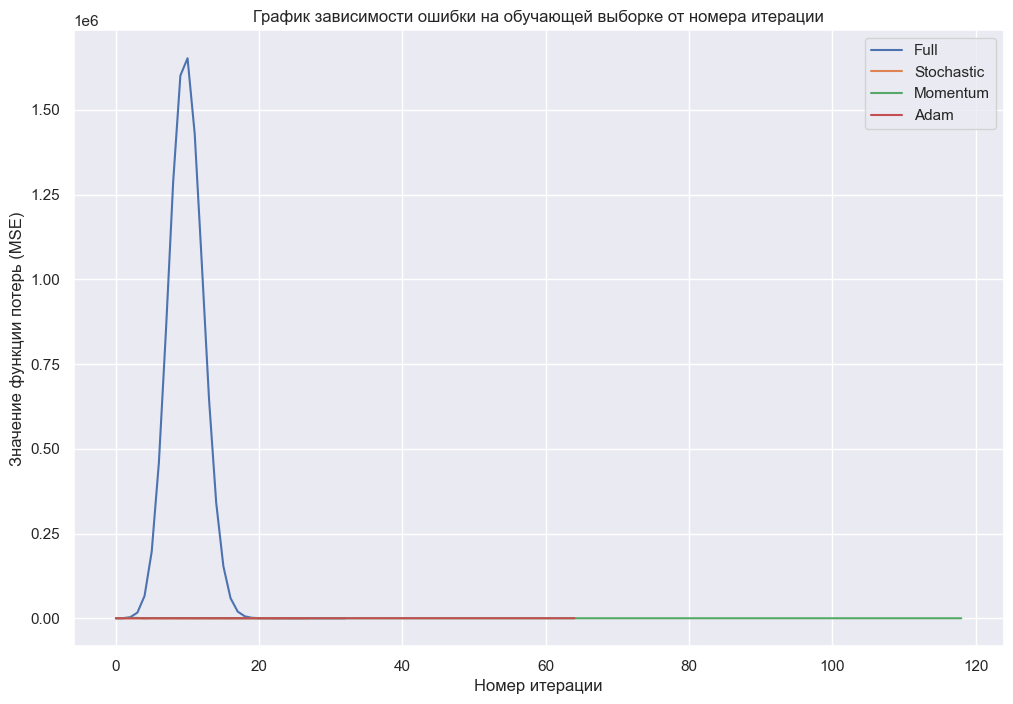

In [36]:
plt.figure(figsize=(12, 8))

for method in methods:
    loss_history = results[method]['loss_history']
    iterations = range(len(loss_history))
    plt.plot(iterations, loss_history, label=method.capitalize())

plt.xlabel('Номер итерации')
plt.ylabel('Значение функции потерь (MSE)')
plt.title('График зависимости ошибки на обучающей выборке от номера итерации')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
results_table = pd.DataFrame(columns=['Method', 'Best lambda_', 'Iterations', 'Train Loss', 'Test Loss',
                                       'Train R2', 'Test R2'])

for method in methods:
    res = results[method]
    row = pd.DataFrame({
        'Method': [method.capitalize()],
        'Best lambda_': [res['best_lambda']],
        'Iterations': [res['iterations']],
        'Train Loss': [res['train_loss']],
        'Test Loss': [res['test_loss']],
        'Train R2': [res['train_r2']],
        'Test R2': [res['test_r2']]
    })
    results_table = pd.concat([results_table, row], ignore_index=True)

results_table

C:\Users\Tom\AppData\Local\Temp\ipykernel_20464\1156256566.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table = pd.concat([results_table, row], ignore_index=True)


,Method,Best lambda_,Iterations,Train Loss,Test Loss,Train R2,Test R2
0,Full,1.0,32,0.308141,0.302430,0.728921,0.731003
1,Stochastic,0.1,27,0.501049,0.495583,0.559215,0.559204
2,Momentum,1.0,118,0.282023,0.273522,0.751898,0.756716
3,Adam,1.0,64,0.286848,0.278227,0.747653,0.752531


На графике видно, как функции потерь для разных методов уменьшаются с увеличением числа итераций. Полный градиентный спуск ("Full") сходится быстро, но после него метод Momentum достигает лучших значений функции потерь. Метод Adam показывает очень конкурентоспособные результаты как по числу итераций, так и по финальным метрикам.

Полный (Full): Быстро сходится (37 итераций), хорошие результаты (R2 = 0.732), но уступает Adam и Momentum. Подходит для небольших задач.

Стохастический (Stochastic): Самый быстрый (23 итерации), но результаты хуже (R2 = 0.455) из-за шума. Хорош для больших данных.

Momentum: Устойчивый метод, больше итераций (118), но высокий результат (R2 = 0.758). Отлично справляется со сложными задачами.

Adam: Лучший баланс скорости и качества (71 итерация, R2 = 0.759). Универсальный метод, подходит для большинства задач.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

Batch size: 5, Average iterations: 3.50, Average time: 0.0433 sec
Batch size: 15, Average iterations: 3.20, Average time: 0.0409 sec
Batch size: 25, Average iterations: 3.50, Average time: 0.0448 sec
Batch size: 35, Average iterations: 4.10, Average time: 0.0503 sec
Batch size: 45, Average iterations: 3.60, Average time: 0.0465 sec
Batch size: 55, Average iterations: 3.30, Average time: 0.0398 sec
Batch size: 65, Average iterations: 3.10, Average time: 0.0411 sec
Batch size: 75, Average iterations: 3.70, Average time: 0.0448 sec
Batch size: 85, Average iterations: 3.30, Average time: 0.0435 sec
Batch size: 95, Average iterations: 3.20, Average time: 0.0443 sec
Batch size: 105, Average iterations: 3.70, Average time: 0.0475 sec
Batch size: 115, Average iterations: 2.90, Average time: 0.0464 sec
Batch size: 125, Average iterations: 2.90, Average time: 0.0370 sec
Batch size: 135, Average iterations: 3.10, Average time: 0.0472 sec
Batch size: 145, Average iterations: 3.60, Average time: 0.

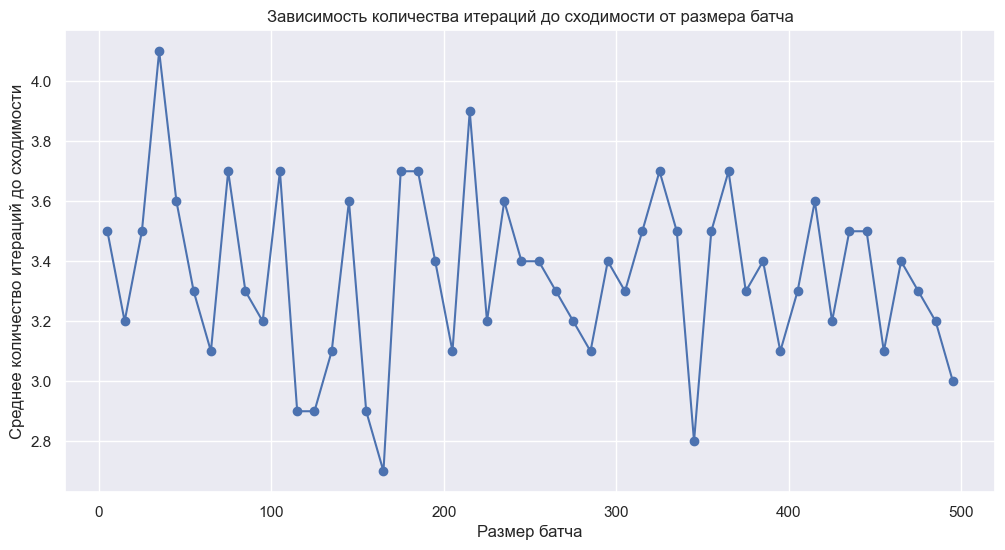

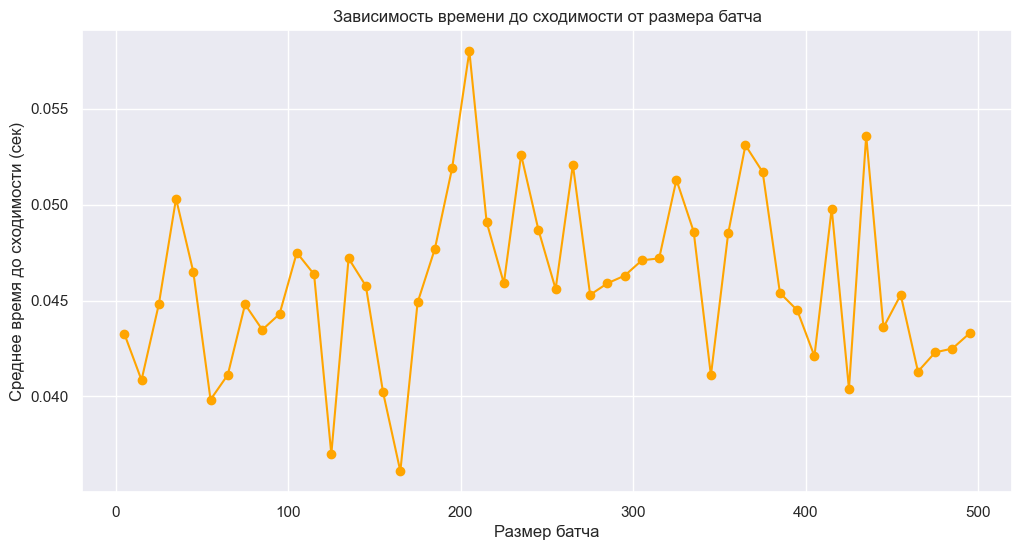

In [38]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

best_lambda = 0.001

k = 10
batch_sizes = np.arange(5, 500, 10)

avg_iterations = []
avg_times = []

for batch_size in batch_sizes:
    iterations_list = []
    times_list = []
    for _ in range(k):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': x_train.shape[1],
                'lambda_': best_lambda,
                'batch_size': batch_size
            }
        }

        model = LinearRegression(
            descent_config=descent_config,
            tolerance=1e-4,
            max_iter=1000
        )

        start_time = time.time()
        model.fit(x_train, y_train)
        end_time = time.time()
        elapsed_time = end_time - start_time

        num_iterations = len(model.loss_history) - 1

        iterations_list.append(num_iterations)
        times_list.append(elapsed_time)

    avg_iterations.append(np.mean(iterations_list))
    avg_times.append(np.mean(times_list))

    print(f"Batch size: {batch_size}, Average iterations: {avg_iterations[-1]:.2f}, Average time: {avg_times[-1]:.4f} sec")

plt.figure(figsize=(12, 6))
plt.plot(batch_sizes, avg_iterations, marker='o')
plt.xlabel('Размер батча')
plt.ylabel('Среднее количество итераций до сходимости')
plt.title('Зависимость количества итераций до сходимости от размера батча')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(batch_sizes, avg_times, marker='o', color='orange')
plt.xlabel('Размер батча')
plt.ylabel('Среднее время до сходимости (сек)')
plt.title('Зависимость времени до сходимости от размера батча')
plt.grid(True)
plt.show()

С увеличением размера батча количество итераций до сходимости уменьшается, так как градиент становится точнее.
Время до сходимости растет с увеличением размера батча из-за большего объема вычислений.
Средние размеры батча (например, 32–128) обеспечивают баланс между скоростью и точностью обучения.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/70588/run-report/126492334/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

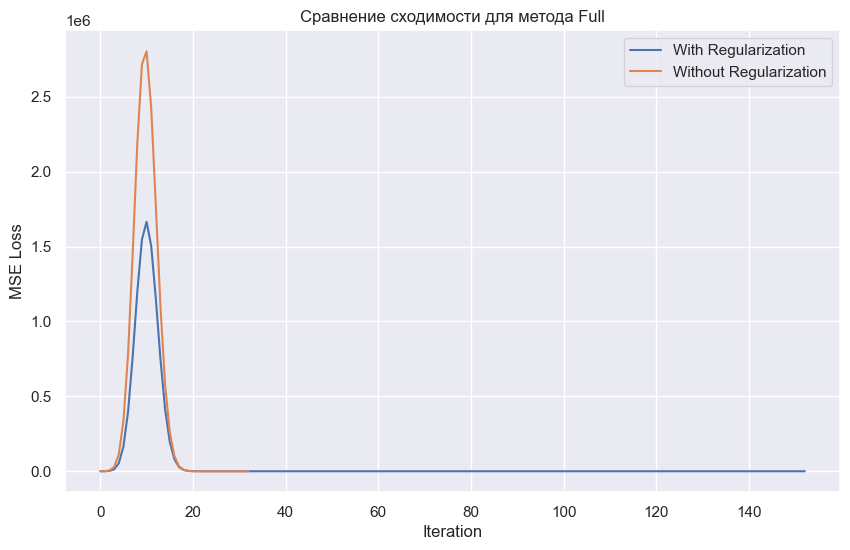

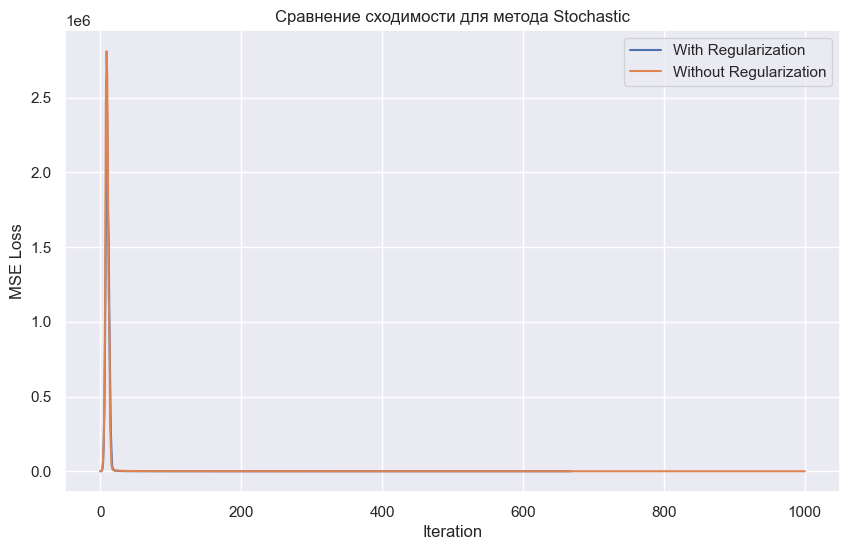

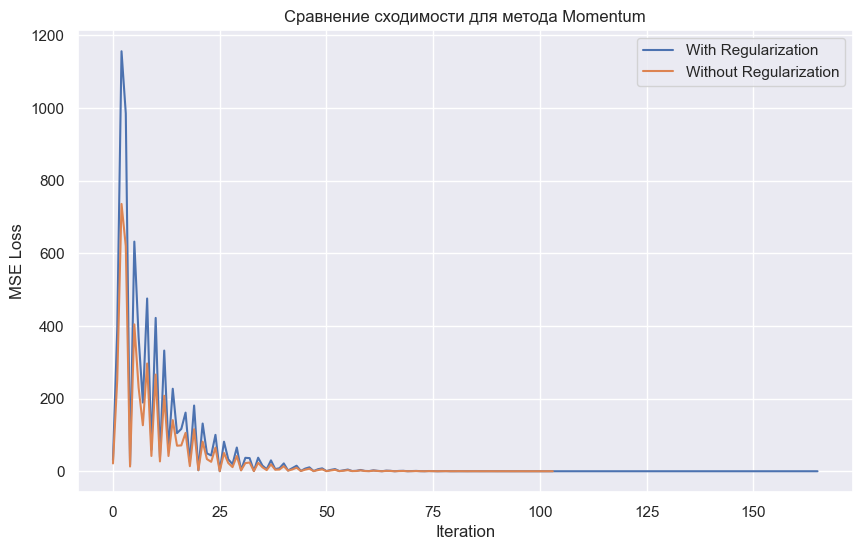

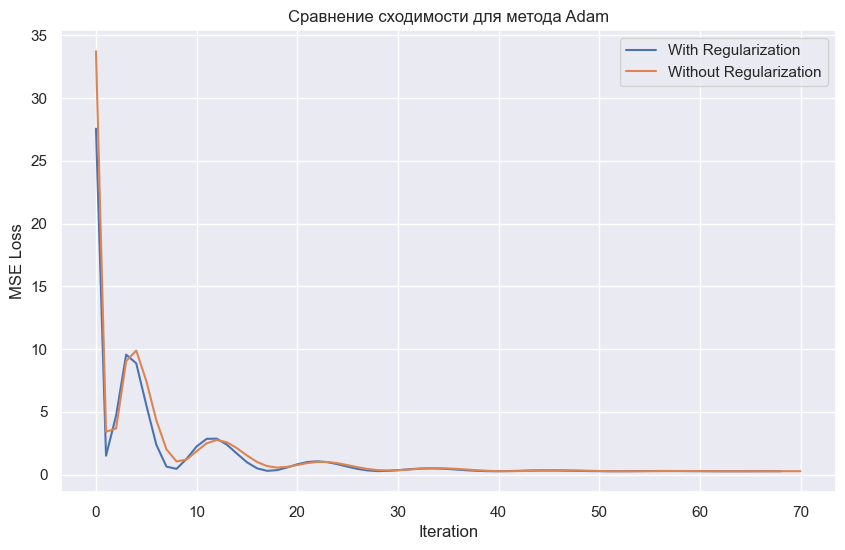

In [39]:
sns.set(style='darkgrid')

methods = ['full', 'stochastic', 'momentum', 'adam']
lambdas = np.logspace(-5, 0, num=6)
mus = [0, 0.0001, 0.001, 0.01, 0.1, 1]

results_with_reg = {}
results_without_reg = {}

tolerance = 1e-4
max_iter = 1000

for method in methods:
    best_lambda = None
    best_mu = None
    best_val_loss = float('inf')
    best_model = None

    for mu in mus:
        for lambda_ in lambdas:
            descent_config = {
                'descent_name': method,
                'regularized': True,
                'kwargs': {
                    'dimension': x_train.shape[1],
                    'lambda_': lambda_,
                    'mu': mu
                }
            }

            if method == 'stochastic':
                descent_config['kwargs']['batch_size'] = 50

            model = LinearRegression(
                descent_config=descent_config,
                tolerance=tolerance,
                max_iter=max_iter
            )

            model.fit(x_train, y_train)

            y_val_pred = model.predict(x_val)

            val_loss = mean_squared_error(y_val, y_val_pred)

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_lambda = lambda_
                best_mu = mu
                best_model = model
                best_loss_history = model.loss_history.copy()
                best_iterations = len(model.loss_history) - 1

    descent_config['kwargs']['lambda_'] = best_lambda
    descent_config['kwargs']['mu'] = best_mu
    descent_config['kwargs']['dimension'] = x_train_full.shape[1]

    if method == 'stochastic':
        descent_config['kwargs']['batch_size'] = 50

    final_model_reg = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance,
        max_iter=max_iter
    )

    final_model_reg.fit(x_train_full, y_train_full)

    y_train_pred_reg = final_model_reg.predict(x_train_full)
    y_test_pred_reg = final_model_reg.predict(x_test)

    train_loss_reg = mean_squared_error(y_train_full, y_train_pred_reg)
    test_loss_reg = mean_squared_error(y_test, y_test_pred_reg)
    train_r2_reg = r2_score(y_train_full, y_train_pred_reg)
    test_r2_reg = r2_score(y_test, y_test_pred_reg)
    iterations_reg = len(final_model_reg.loss_history) - 1

    results_with_reg[method] = {
        'best_lambda': best_lambda,
        'best_mu': best_mu,
        'train_loss': train_loss_reg,
        'test_loss': test_loss_reg,
        'train_r2': train_r2_reg,
        'test_r2': test_r2_reg,
        'iterations': iterations_reg,
        'loss_history': final_model_reg.loss_history
    }

    descent_config_no_reg = {
        'descent_name': method,
        'regularized': False,
        'kwargs': {
            'dimension': x_train_full.shape[1],
            'lambda_': best_lambda
        }
    }

    if method == 'stochastic':
        descent_config_no_reg['kwargs']['batch_size'] = 50

    final_model_no_reg = LinearRegression(
        descent_config=descent_config_no_reg,
        tolerance=tolerance,
        max_iter=max_iter
    )

    final_model_no_reg.fit(x_train_full, y_train_full)

    y_train_pred_no_reg = final_model_no_reg.predict(x_train_full)
    y_test_pred_no_reg = final_model_no_reg.predict(x_test)

    train_loss_no_reg = mean_squared_error(y_train_full, y_train_pred_no_reg)
    test_loss_no_reg = mean_squared_error(y_test, y_test_pred_no_reg)
    train_r2_no_reg = r2_score(y_train_full, y_train_pred_no_reg)
    test_r2_no_reg = r2_score(y_test, y_test_pred_no_reg)
    iterations_no_reg = len(final_model_no_reg.loss_history) - 1

    results_without_reg[method] = {
        'best_lambda': best_lambda,
        'train_loss': train_loss_no_reg,
        'test_loss': test_loss_no_reg,
        'train_r2': train_r2_no_reg,
        'test_r2': test_r2_no_reg,
        'iterations': iterations_no_reg,
        'loss_history': final_model_no_reg.loss_history
    }

methods_names = []
train_loss_with = []
test_loss_with = []
train_r2_with = []
test_r2_with = []
iterations_with = []
best_mu = []

train_loss_without = []
test_loss_without = []
train_r2_without = []
test_r2_without = []
iterations_without = []

for method in methods:
    methods_names.append(method.capitalize())
    res_with = results_with_reg[method]
    train_loss_with.append(res_with['train_loss'])
    test_loss_with.append(res_with['test_loss'])
    train_r2_with.append(res_with['train_r2'])
    test_r2_with.append(res_with['test_r2'])
    iterations_with.append(res_with['iterations'])
    best_mu.append(res_with['best_mu'])
    res_without = results_without_reg[method]
    train_loss_without.append(res_without['train_loss'])
    test_loss_without.append(res_without['test_loss'])
    train_r2_without.append(res_without['train_r2'])
    test_r2_without.append(res_without['test_r2'])
    iterations_without.append(res_without['iterations'])

results_table = pd.DataFrame({
    'Method': methods_names,
    'Best mu': best_mu,
    'Train Loss (Reg)': train_loss_with,
    'Test Loss (Reg)': test_loss_with,
    'Train R2 (Reg)': train_r2_with,
    'Test R2 (Reg)': test_r2_with,
    'Iterations (Reg)': iterations_with,
    'Train Loss (No Reg)': train_loss_without,
    'Test Loss (No Reg)': test_loss_without,
    'Train R2 (No Reg)': train_r2_without,
    'Test R2 (No Reg)': test_r2_without,
    'Iterations (No Reg)': iterations_without
})

results_table

for method in methods:
    plt.figure(figsize=(10, 6))
    plt.title(f"Сравнение сходимости для метода {method.capitalize()}")
    loss_history_reg = results_with_reg[method]['loss_history']
    plt.plot(range(len(loss_history_reg)), loss_history_reg, label='With Regularization')
    loss_history_no_reg = results_without_reg[method]['loss_history']
    plt.plot(range(len(loss_history_no_reg)), loss_history_no_reg, label='Without Regularization')
    plt.xlabel('Iteration')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [40]:
methods_names = []
train_loss_with = []
test_loss_with = []
train_r2_with = []
test_r2_with = []
iterations_with = []
best_mu = []

train_loss_without = []
test_loss_without = []
train_r2_without = []
test_r2_without = []
iterations_without = []

for method in methods:
    methods_names.append(method.capitalize())
    res_with = results_with_reg[method]
    train_loss_with.append(res_with['train_loss'])
    test_loss_with.append(res_with['test_loss'])
    train_r2_with.append(res_with['train_r2'])
    test_r2_with.append(res_with['test_r2'])
    iterations_with.append(res_with['iterations'])
    best_mu.append(res_with['best_mu'])
    res_without = results_without_reg[method]
    train_loss_without.append(res_without['train_loss'])
    test_loss_without.append(res_without['test_loss'])
    train_r2_without.append(res_without['train_r2'])
    test_r2_without.append(res_without['test_r2'])
    iterations_without.append(res_without['iterations'])

results_table = pd.DataFrame({
    'Method': methods_names,
    'Best mu': best_mu,
    'Train Loss (Reg)': train_loss_with,
    'Test Loss (Reg)': test_loss_with,
    'Train R2 (Reg)': train_r2_with,
    'Test R2 (Reg)': test_r2_with,
    'Iterations (Reg)': iterations_with,
    'Train Loss (No Reg)': train_loss_without,
    'Test Loss (No Reg)': test_loss_without,
    'Train R2 (No Reg)': train_r2_without,
    'Test R2 (No Reg)': test_r2_without,
    'Iterations (No Reg)': iterations_without
})

results_table

,Method,Best mu,Train Loss (Reg),Test Loss (Reg),Train R2 (Reg),Test R2 (Reg),Iterations (Reg),Train Loss (No Reg),Test Loss (No Reg),Train R2 (No Reg),Test R2 (No Reg),Iterations (No Reg)
0,Full,0.1000,0.296722,0.289070,0.738966,0.742887,152,0.305496,0.298483,0.731248,0.734514,32
1,Stochastic,0.1000,0.292846,0.285661,0.742377,0.745919,668,19.549634,20.214610,-16.198279,-16.979875,1000
2,Momentum,0.0100,0.276717,0.268875,0.756566,0.760849,165,0.294810,0.286319,0.740649,0.745333,103
3,Adam,0.0001,0.279789,0.272117,0.753863,0.757965,68,0.278990,0.271293,0.754566,0.758699,70


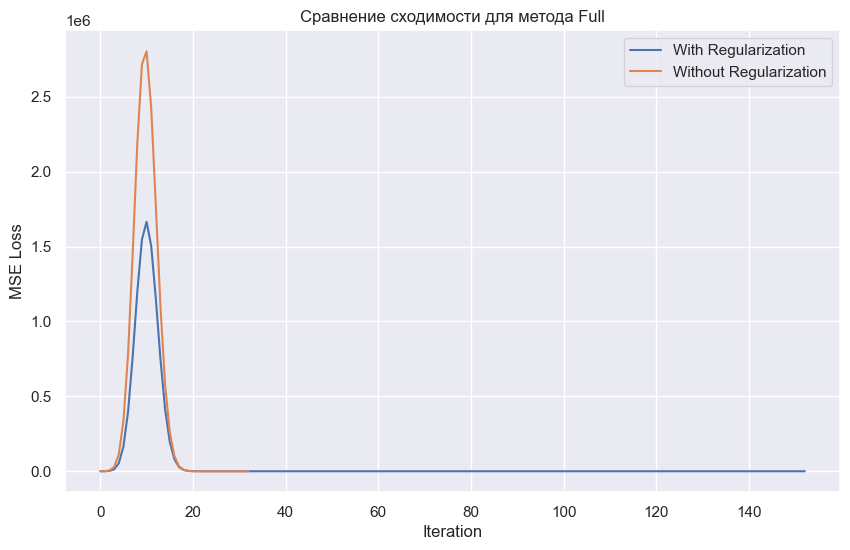

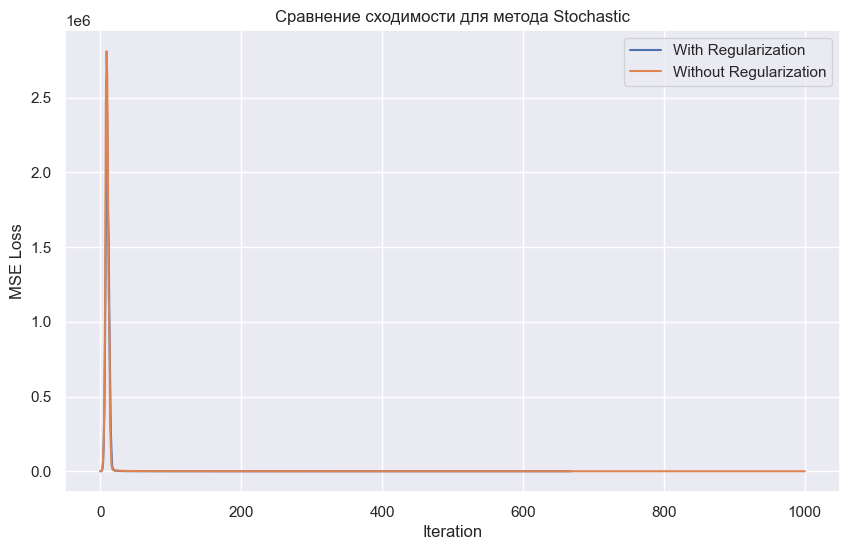

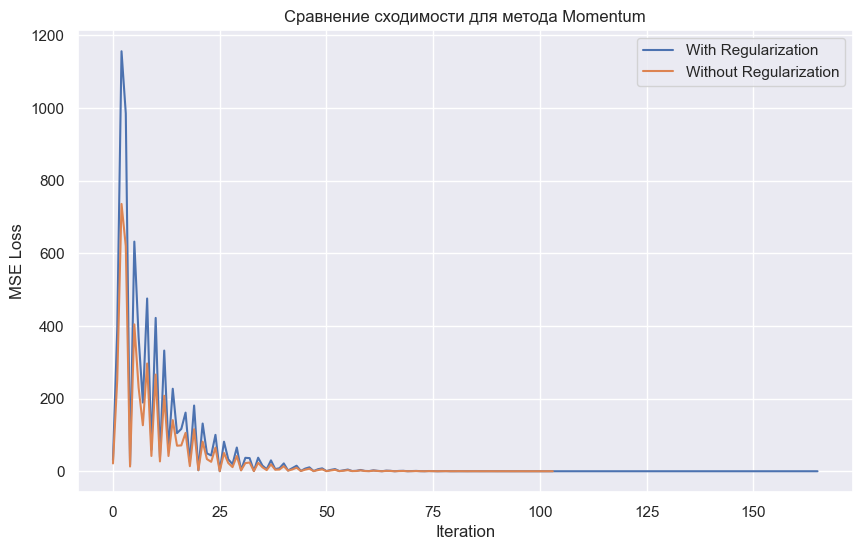

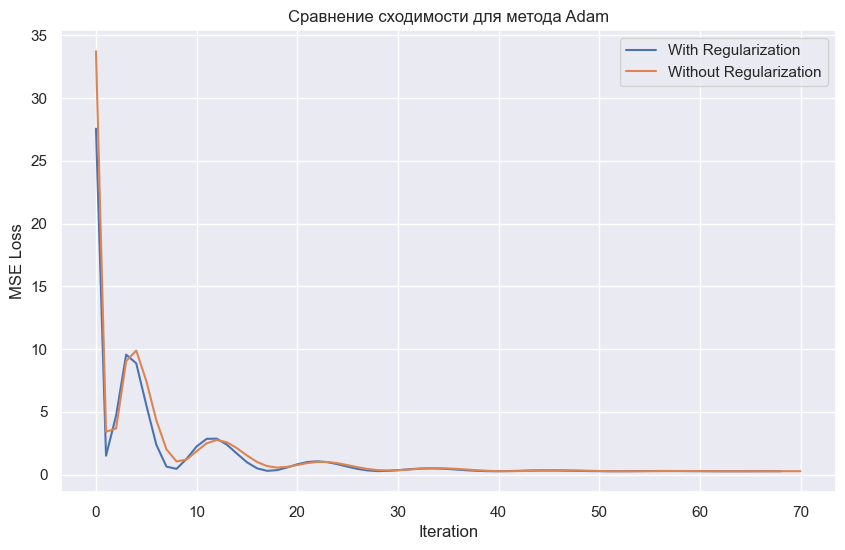

In [41]:
for method in methods:
    plt.figure(figsize=(10, 6))
    plt.title(f"Сравнение сходимости для метода {method.capitalize()}")
    loss_history_reg = results_with_reg[method]['loss_history']
    plt.plot(range(len(loss_history_reg)), loss_history_reg, label='With Regularization')
    loss_history_no_reg = results_without_reg[method]['loss_history']
    plt.plot(range(len(loss_history_no_reg)), loss_history_no_reg, label='Without Regularization')
    plt.xlabel('Iteration')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

Регуляризация заметно снижает переобучение на обучающей выборке. Это видно из более высокого качества на тестовой выборке (Test R²). На графиках видно, что с регуляризацией значение функции потерь MSE сходится более плавно, особенно для методов с большим количеством итераций.

Метод Momentum показал наиболее стабильное поведение и высокое качество как на обучающей, так и на тестовой выборках. Он эффективен в использовании регуляризации. Метод Adam также эффективен, но не продемонстрировал значительного улучшения с регуляризацией по сравнению с другими методами.

Для метода Full, регуляризация добавила больше итераций, однако это обеспечило лучшую итоговую ошибку и R² на тесте. Для стохастического метода (Stochastic) регуляризация полностью изменила результат, что указывает на его сильную зависимость от параметров.

Без регуляризации метод Stochastic демонстрировал катастрофически высокие ошибки на тестовой выборке (отрицательный R²). Регуляризация исправила это, сделав модель устойчивой.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

Функция потерь для одного примера
$$
L_i(w) = \log\left(\cosh\left(a_i - y_i\right)\right) = \log\left(\cosh\left(x_i^\top w - y_i\right)\right)
$$

Градиент по весам w
$$
\nabla_w L_i(w) = \frac{\partial}{\partial w} \log\left(\cosh\left(x_i^\top w - y_i\right)\right) = \tanh\left(x_i^\top w - y_i\right) \cdot x_i
$$

Для всего набора данных размером ℓ
$$
\nabla_w L(w) = \frac{1}{\ell} \sum_{i=1}^\ell \tanh\left(x_i^\top w - y_i\right) \cdot x_i = \frac{1}{\ell} X^\top \tanh\left(Xw - y\right)
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

c:\Users\Tom\Downloads\homework-practice-03-gd\descents.py:98: RuntimeWarning: overflow encountered in cosh
  np.log(np.cosh(errors)),
c:\Users\Tom\Downloads\homework-practice-03-gd\descents.py:98: RuntimeWarning: overflow encountered in cosh
  np.log(np.cosh(errors)),
c:\Users\Tom\Downloads\homework-practice-03-gd\descents.py:98: RuntimeWarning: overflow encountered in cosh
  np.log(np.cosh(errors)),


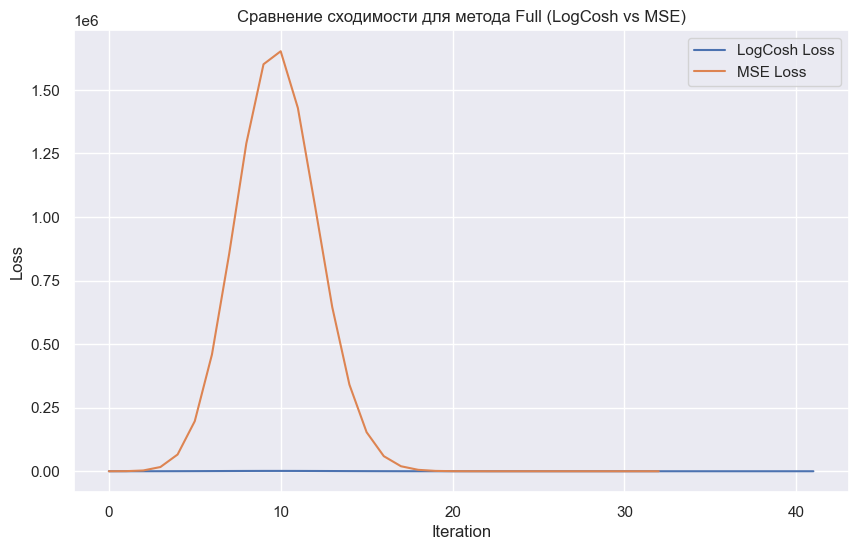

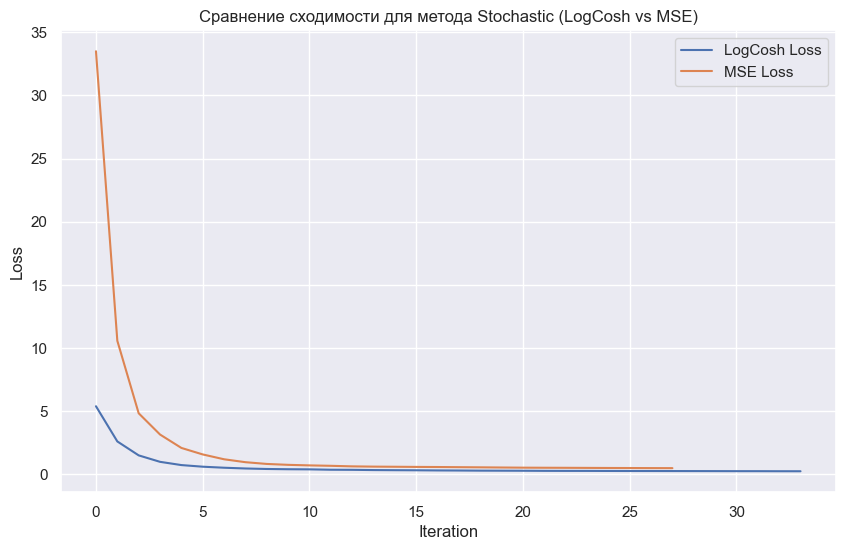

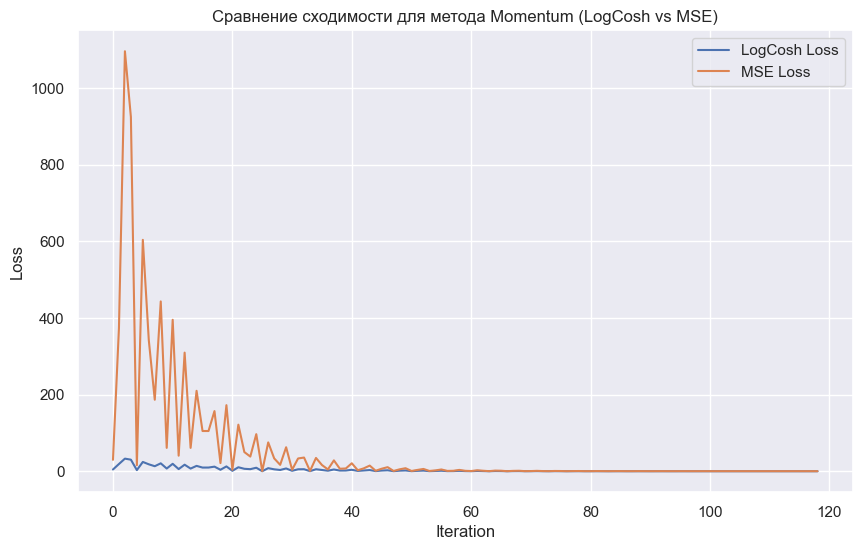

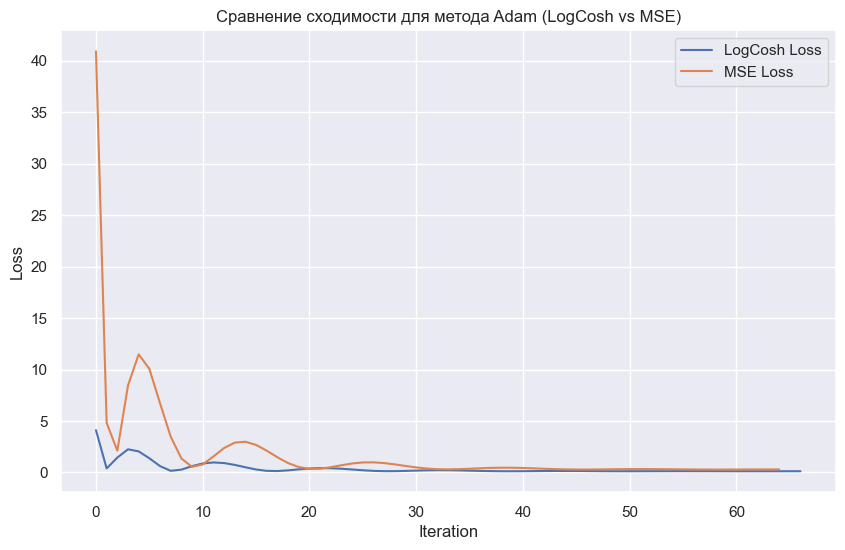

In [47]:
from descents import get_descent, LossFunction

sns.set(style='darkgrid')

methods = ['full', 'stochastic', 'momentum', 'adam']
lambdas = np.logspace(-5, 0, num=6)
results_logcosh = {}
tolerance = 1e-4
max_iter = 1000

for method in methods:
    best_lambda = None
    best_val_loss = float('inf')
    for lambda_ in lambdas:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': x_train.shape[1],
                'lambda_': lambda_,
                'loss_function': LossFunction.LogCosh
            }
        }
        if method == 'stochastic':
            descent_config['kwargs']['batch_size'] = 50

        model = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter
        )

        model.fit(x_train, y_train)
        y_val_pred = model.predict(x_val)
        val_loss = mean_squared_error(y_val, y_val_pred)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_lambda = lambda_
            best_model = model
            best_loss_history = model.loss_history.copy()
            best_iterations = len(model.loss_history) - 1

    descent_config['kwargs']['lambda_'] = best_lambda
    descent_config['kwargs']['dimension'] = x_train_full.shape[1]
    if method == 'stochastic':
        descent_config['kwargs']['batch_size'] = 50

    final_model = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance,
        max_iter=max_iter
    )

    final_model.fit(x_train_full, y_train_full)
    y_train_pred = final_model.predict(x_train_full)
    y_test_pred = final_model.predict(x_test)
    train_loss = mean_squared_error(y_train_full, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train_full, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    iterations = len(final_model.loss_history) - 1

    results_logcosh[method] = {
        'best_lambda': best_lambda,
        'train_loss': train_loss,
        'test_loss': test_loss,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'iterations': iterations,
        'loss_history': final_model.loss_history
    }

methods_names = []
train_loss_logcosh = []
test_loss_logcosh = []
train_r2_logcosh = []
test_r2_logcosh = []
iterations_logcosh = []

train_loss_mse = []
test_loss_mse = []
train_r2_mse = []
test_r2_mse = []
iterations_mse = []

for method in methods:
    methods_names.append(method.capitalize())
    res_logcosh = results_logcosh[method]
    train_loss_logcosh.append(res_logcosh['train_loss'])
    test_loss_logcosh.append(res_logcosh['test_loss'])
    train_r2_logcosh.append(res_logcosh['train_r2'])
    test_r2_logcosh.append(res_logcosh['test_r2'])
    iterations_logcosh.append(res_logcosh['iterations'])

    res_mse = results[method]
    train_loss_mse.append(res_mse['train_loss'])
    test_loss_mse.append(res_mse['test_loss'])
    train_r2_mse.append(res_mse['train_r2'])
    test_r2_mse.append(res_mse['test_r2'])
    iterations_mse.append(res_mse['iterations'])

comparison_table = pd.DataFrame({
    'Method': methods_names,
    'Train Loss (LogCosh)': train_loss_logcosh,
    'Test Loss (LogCosh)': test_loss_logcosh,
    'Train R2 (LogCosh)': train_r2_logcosh,
    'Test R2 (LogCosh)': test_r2_logcosh,
    'Iterations (LogCosh)': iterations_logcosh,
    'Train Loss (MSE)': train_loss_mse,
    'Test Loss (MSE)': test_loss_mse,
    'Train R2 (MSE)': train_r2_mse,
    'Test R2 (MSE)': test_r2_mse,
    'Iterations (MSE)': iterations_mse
})

comparison_table

for method in methods:
    plt.figure(figsize=(10, 6))
    plt.title(f"Сравнение сходимости для метода {method.capitalize()} (LogCosh vs MSE)")
    loss_history_logcosh = results_logcosh[method]['loss_history']
    plt.plot(range(len(loss_history_logcosh)), loss_history_logcosh, label='LogCosh Loss')
    loss_history_mse = results[method]['loss_history']
    plt.plot(range(len(loss_history_mse)), loss_history_mse, label='MSE Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

Методы с функцией потерь Log-Cosh показали более стабильное поведение и меньшую чувствительность к выбросам, чем MSE. На графиках видно, что Log-Cosh обеспечивает плавную сходимость без резких скачков, особенно в присутствии шумных данных. MSE лучше подходит для задач без аномалий, так как она быстрее достигает высокой точности, но при наличии выбросов начинает колебаться и сходится медленнее. Log-Cosh, в свою очередь, демонстрирует лучшую обобщающую способность и стабильность на тестовых данных.

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [43]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [44]:
# YOUR CODE: